![Colegio Bourbaki](./Images/Bourbaki.png)

### Librerias

In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Producción de Petróleo

In [3]:
df = pd.read_csv('./Data/petroleo_diaria_pais.csv')

In [4]:
df

,anio,mes,indice_tiempo,produccion_petroleo_promedio_dia_m3
0,2009,1,2009-01,97924.5991
1,2009,2,2009-02,100044.0659
2,2009,3,2009-03,99329.5204
3,2009,4,2009-04,98880.3859
4,2009,5,2009-05,98151.9991
...,...,...,...,...
175,2023,8,2023-08,98899.7214
176,2023,9,2023-09,101249.5925
177,2023,10,2023-10,103903.3087
178,2023,11,2023-11,105964.1426


In [5]:
# Convert 'date' to datetime and rename columns for Prophet
df['ds'] = pd.to_datetime(df['indice_tiempo'])
df.rename(columns={'produccion_petroleo_promedio_dia_m3': 'y'}, inplace=True)

In [6]:
df

,anio,mes,indice_tiempo,y,ds
0,2009,1,2009-01,97924.5991,2009-01-01
1,2009,2,2009-02,100044.0659,2009-02-01
2,2009,3,2009-03,99329.5204,2009-03-01
3,2009,4,2009-04,98880.3859,2009-04-01
4,2009,5,2009-05,98151.9991,2009-05-01
...,...,...,...,...,...
175,2023,8,2023-08,98899.7214,2023-08-01
176,2023,9,2023-09,101249.5925,2023-09-01
177,2023,10,2023-10,103903.3087,2023-10-01
178,2023,11,2023-11,105964.1426,2023-11-01


In [7]:
# Drop the original 'date' column as it's no longer needed
df.drop(columns=['anio', 'mes', 'indice_tiempo'], inplace=True)

In [8]:
df

,y,ds
0,97924.5991,2009-01-01
1,100044.0659,2009-02-01
2,99329.5204,2009-03-01
3,98880.3859,2009-04-01
4,98151.9991,2009-05-01
...,...,...
175,98899.7214,2023-08-01
176,101249.5925,2023-09-01
177,103903.3087,2023-10-01
178,105964.1426,2023-11-01


In [9]:
# Initialize the Prophet model
model = Prophet(yearly_seasonality=True)

# Fit the model with the oil production DataFrame
model.fit(df)

18:49:11 - cmdstanpy - INFO - Chain [1] start processing
18:49:11 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
# Make a future DataFrame for the next 12 months
future = model.make_future_dataframe(periods=36, freq='ME')

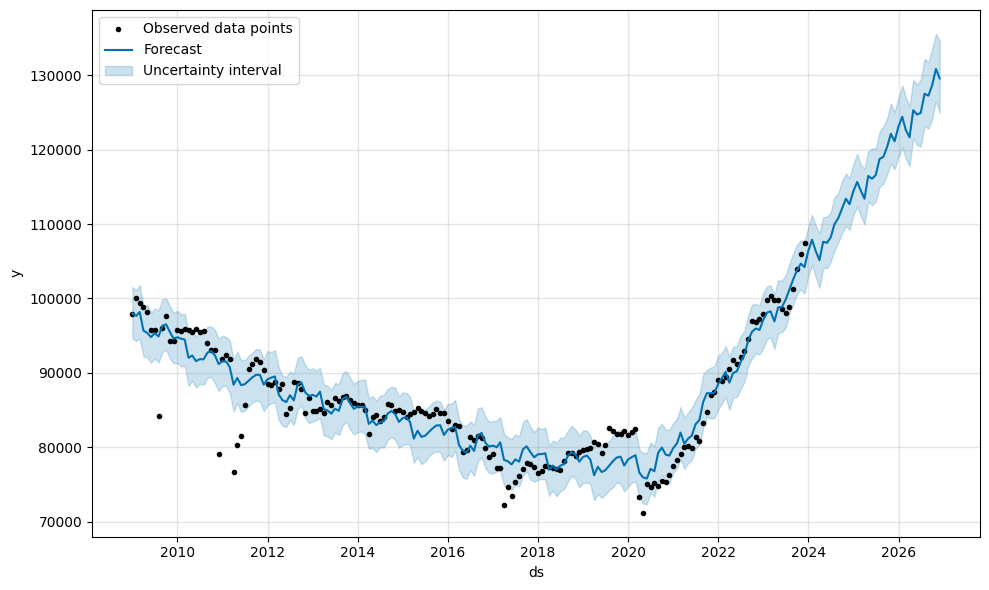

In [11]:
# Predict the future oil production
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast, include_legend=True)

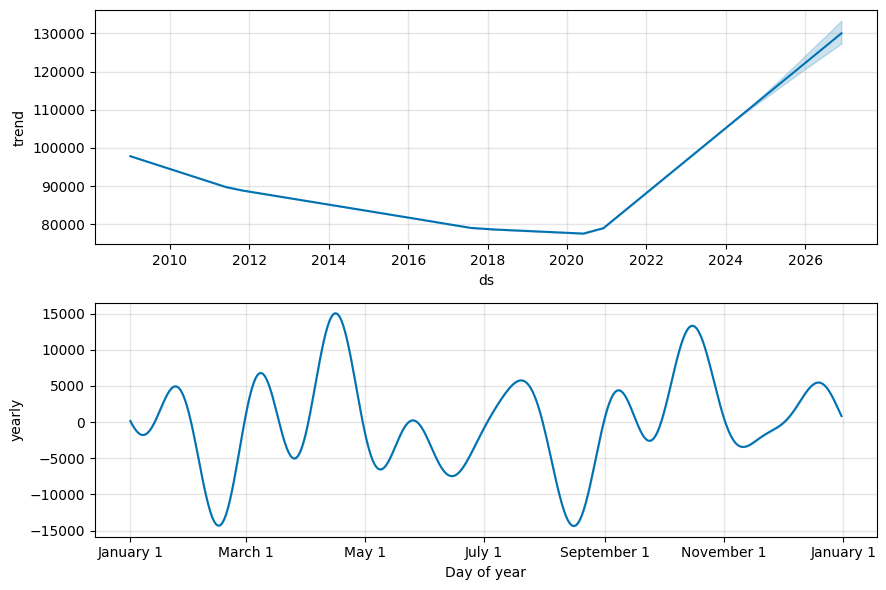

In [12]:
fig_components = model.plot_components(forecast)

### Producción de Gas

In [13]:
df = pd.read_csv('./Data/gas_diaria_pais.csv')

In [14]:
df

,anio,mes,indice_tiempo,produccion_gas_promedio_dia_mm3
0,2009,1,2009-01,131223.0108
1,2009,2,2009-02,132833.2683
2,2009,3,2009-03,135361.2048
3,2009,4,2009-04,135493.2462
4,2009,5,2009-05,135374.4330
...,...,...,...,...
175,2023,8,2023-08,144374.8508
176,2023,9,2023-09,143185.6279
177,2023,10,2023-10,125936.3690
178,2023,11,2023-11,126286.3582


In [15]:
# Convert 'date' to datetime and rename columns for Prophet
df['ds'] = pd.to_datetime(df['indice_tiempo'])
df.rename(columns={'produccion_gas_promedio_dia_mm3': 'y'}, inplace=True)

In [16]:
df

,anio,mes,indice_tiempo,y,ds
0,2009,1,2009-01,131223.0108,2009-01-01
1,2009,2,2009-02,132833.2683,2009-02-01
2,2009,3,2009-03,135361.2048,2009-03-01
3,2009,4,2009-04,135493.2462,2009-04-01
4,2009,5,2009-05,135374.4330,2009-05-01
...,...,...,...,...,...
175,2023,8,2023-08,144374.8508,2023-08-01
176,2023,9,2023-09,143185.6279,2023-09-01
177,2023,10,2023-10,125936.3690,2023-10-01
178,2023,11,2023-11,126286.3582,2023-11-01


In [17]:
# Drop the original 'date' column as it's no longer needed
df.drop(columns=['anio', 'mes', 'indice_tiempo'], inplace=True)

In [18]:
df

,y,ds
0,131223.0108,2009-01-01
1,132833.2683,2009-02-01
2,135361.2048,2009-03-01
3,135493.2462,2009-04-01
4,135374.4330,2009-05-01
...,...,...
175,144374.8508,2023-08-01
176,143185.6279,2023-09-01
177,125936.3690,2023-10-01
178,126286.3582,2023-11-01


In [19]:
# Initialize the Prophet model
model = Prophet(yearly_seasonality=True)

# Fit the model with the oil production DataFrame
model.fit(df)

18:49:12 - cmdstanpy - INFO - Chain [1] start processing
18:49:12 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
# Make a future DataFrame for the next 12 months
future = model.make_future_dataframe(periods=36, freq='ME')

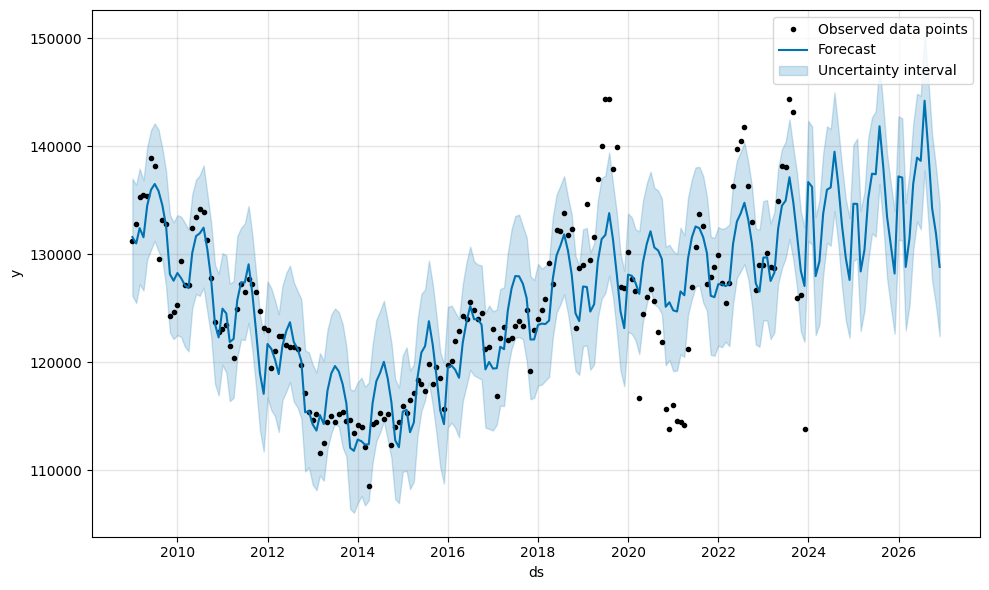

In [21]:
# Predict the future oil production
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast, include_legend=True)

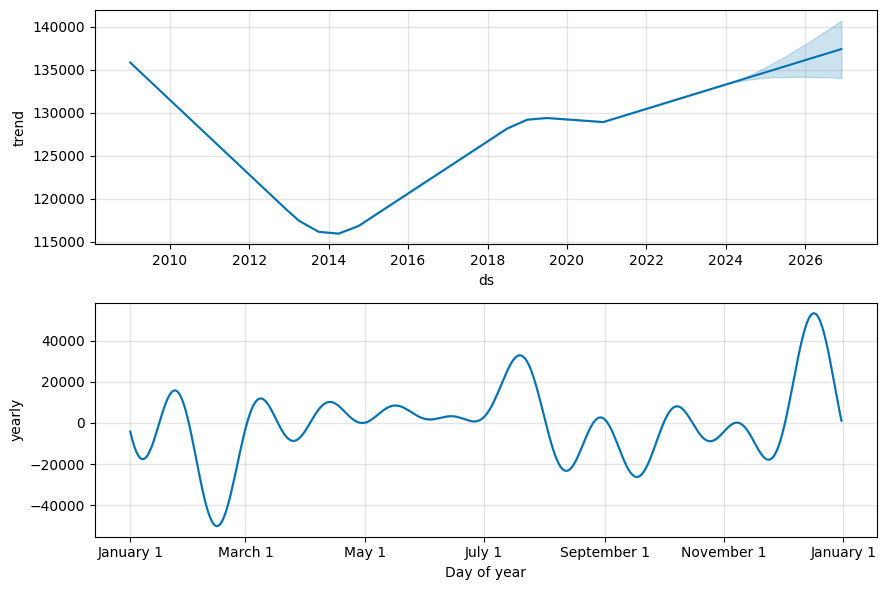

In [22]:
fig_components = model.plot_components(forecast)

![Lenguaje Matemático](./Images/Matematicas.png)

![Contacto](./Images/Contacto.png)